In [1]:
import warnings
warnings.simplefilter('ignore')

# Introduction

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.<br>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.<br>This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.<br>Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.<br>In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Variable Notes

**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

**parch:** The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

# Load librairies

In [2]:
import pandas as pd # Data manipulation
import numpy as np # Data manipulation

import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation

# Load data

In [3]:
test = pd.read_csv("input/test.csv")
train = pd.read_csv("input/train.csv")

# Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years|
|sibsp|# of siblings / spouses aboard the Titanic|
|parch|# of parents / children aboard the Titanic|
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

# File structure and content

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data set seems to not contain outliers.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Variables types seems normal

In [6]:
train.shape

(891, 12)

# individual features visualisations

## Survived

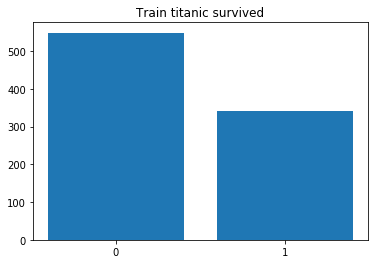

In [7]:
# Label of survived categorie
label = train.Survived.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_survived = train.Survived.value_counts()

# Create bars
plt.bar(index, num_survived)
 
# Create names on the x-axis
plt.xticks(index, label)

# Title of the plot
plt.title('Train titanic survived')
 
# Show graphic
plt.show()

In [8]:
train['Survived'].isnull().sum()

0

There are **342** passenger who survived to the sinking. And **549** who not survived.

There is no missing value

## Pclass

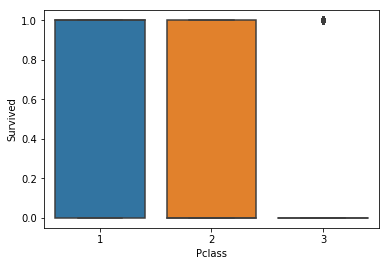

In [9]:
# Make boxplot
sns.boxplot(x=train['Pclass'], y=train['Survived'])
plt.show()

In [10]:
train[train['Pclass'] == 3].Survived.value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [11]:
train[train['Pclass'] == 2].Survived.value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [12]:
train[train['Pclass'] == 1].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

We can observe than Pclass 3 passengers have a higher ratio of death than other Pclass. <br>
Pclass 1 passenger have more chance to survive than other passenger.

## Sex

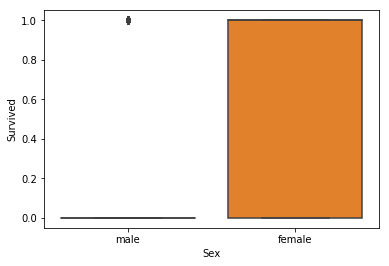

In [13]:
# Make boxplot
sns.boxplot(x=train['Sex'], y=train['Survived'])
plt.show()

In [14]:
train[train['Sex'] == 'male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [15]:
train[train['Sex'] == 'female'].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

Female passenger have more chance to survive than male passenger.

## Age

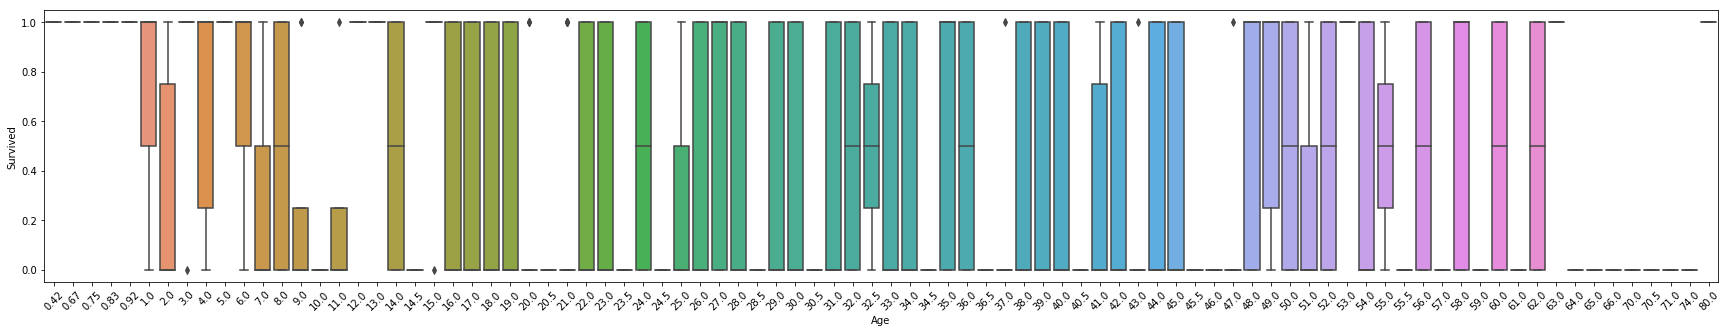

In [16]:
# Make boxplot
plt.figure(figsize=(30,5))
plt.xticks(rotation='45')
sns.boxplot(x=train['Age'], y=train['Survived'])
plt.show()

We can observe that passenger have age in float type. This is not a normal age format. we will need to handle this in floowing parts. 

We can obserse young passengers have more chance to survive than others.

## SibSp

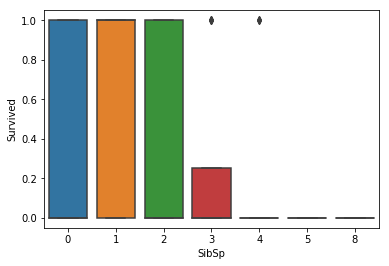

In [17]:
# Make boxplot
sns.boxplot(x=train['SibSp'], y=train['Survived'])
plt.show()

Passengers with more than 2 SibSp on board have less chances to survive. 

## Parch

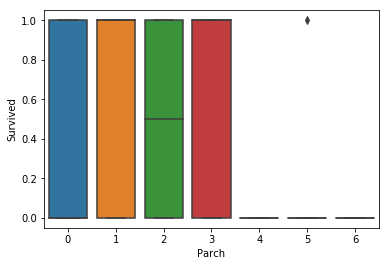

In [18]:
# Make boxplot
sns.boxplot(x=train['Parch'], y=train['Survived'])
plt.show()

Passenger with more than 3 parents or child on board have less chances to survive.

## fare

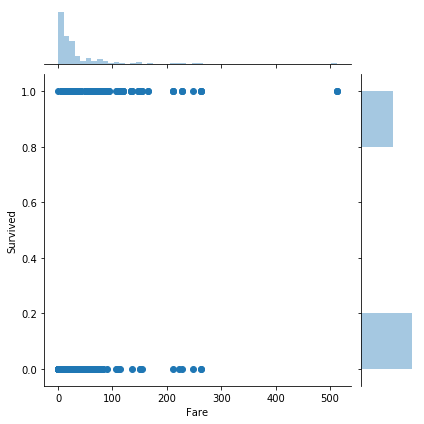

In [19]:
# Make jointplot
sns.jointplot(x=train['Fare'], y=train['Survived'])
plt.show()

In [20]:
train[train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Fare does not seems to have an impact on the passengers probability to survived.<br>
But we can observe 3 passenger had bought most expensive ticket and all survived. 

## Embarked

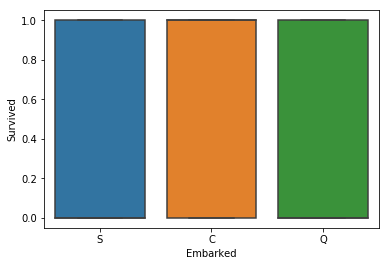

In [21]:
# Make boxplot
sns.boxplot(x=train['Embarked'], y=train['Survived'])
plt.show()

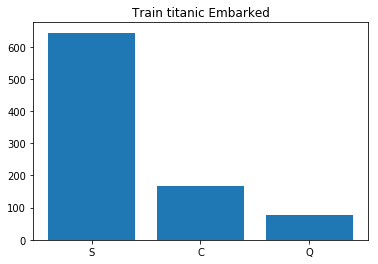

In [22]:
# Label of Embarked categorie
label = train.Embarked.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_Embarked = train.Embarked.value_counts()

# Create bars
plt.bar(index, num_Embarked)
 
# Create names on the x-axis
plt.xticks(index, label)

# Title of the plot
plt.title('Train titanic Embarked')
 
# Show graphic
plt.show()

Embarked correspond to the port of Embarkation:
- C = Cherbourg
- Q = Queenstown
- S = Southampton

Most of peolpe embarked in Southampton **(644)**, **68** in Cherbourg and **77** in Queenstown. 

The port of embarkation of passengers does not seems to have an impact on the passenger probability to survived. 

# Data Preparation train dataset

In [23]:
data = [train, test]

## Add new column

### Title 

In [24]:
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.')

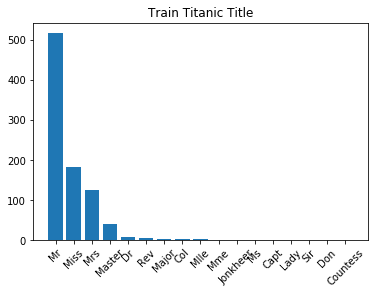

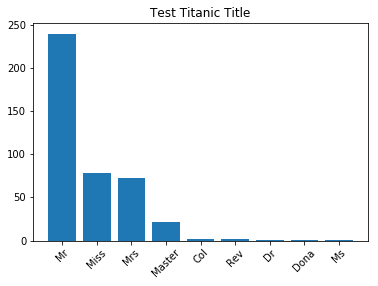

In [25]:
i = 0
for dataset in data:
    
    Title_msg = ["Train Titanic Title", "Test Titanic Title"]
    
    # Label of Embarked categorie
    label = dataset.Title.value_counts().index

    # ndarray of labels & and count of occurence of each labels
    index = np.arange(len(label))
    num_Title = dataset.Title.value_counts()

    # Create bars
    plt.bar(index, num_Title)

    # Create names on the x-axis
    plt.xticks(index, label, rotation ='45')
    
    # Title of the plot
    plt.title(Title_msg[i])

    # Show graphic
    plt.show()
    
    i += 1


There are a lot of different Title. Need to be simplify

In [26]:
for dataset in data:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady', 'Dona','Countess','Jonkheer','Col',
                              'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs', 'Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

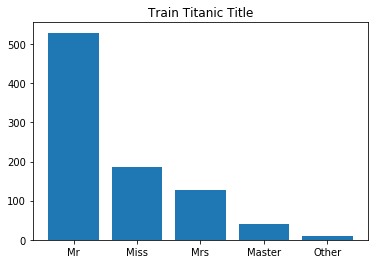

In [27]:
# Label of Title categorie
label = train.Title.value_counts().index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
num_Title = train.Title.value_counts()

# Create bars
plt.bar(index, num_Title)

# Create names on the x-axis
plt.xticks(index, label)
    
# Title of the plot
plt.title("Train Titanic Title")

# Show graphic
plt.show()

### Ticket prefix & Ticket number

In [28]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip() , ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
for dataset in data:
    # Extracting dummy variables from tickets:
    dataset['Ticket'] = dataset['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(dataset['Ticket'],prefix='Ticket')
    dataset = pd.concat([dataset, tickets_dummies],axis=1)

In [29]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,XXX,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,XXX,8.0500,NaN,S,Mr


### Family Size

Famiy size is more relevent as SibSp and Parch for understanding

In [30]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [31]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,XXX,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,XXX,8.0500,NaN,S,Mr,1


## Missing Value

In [32]:
# Combining Datasets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (891, 14)
Test data size is : (418, 13)
Combined dataset size is : (1309, 13)


In [33]:
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


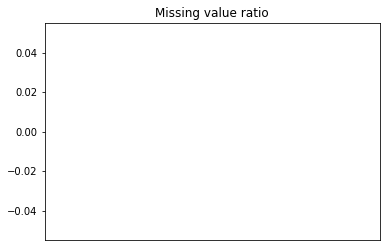

In [83]:
# Label of NaN feature
label = all_data_na.index

# ndarray of labels & and count of occurence of each labels
index = np.arange(len(label))
ratio = all_data_na

# Create bars
plt.bar(index, ratio)

# Create names on the x-axis
plt.xticks(index, label)
    
# Title of the plot
plt.title("Missing value ratio")

# Show graphic
plt.show()

**Imputing Missing Values**

- Cabin : I can not find an explanation to missing cabin. I choose to replace missing value by "U". This mean Unknown.
- Age : No meaning for missing Age value. Missing value for Age, can be aproximate using Title variable. Because Title change with Age. 
- Embarked : No meaning for missing Embarked value. Only 2 missing values. I will replace missing value by the city where most of passengers embarked.
- Fare : The missing Fare value concern Pclass 3 passenger. The class is highly correlated with the fare. I will use this variable to replace missing value. 

**Age**

In [35]:
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Mr'), 'Age']= all_data.Age[all_data.Title=="Mr"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Mrs'), 'Age']= all_data.Age[all_data.Title=="Mrs"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Master'), 'Age']= all_data.Age[all_data.Title=="Master"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Miss'), 'Age']= all_data.Age[all_data.Title=="Miss"].mean()
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Other'), 'Age']= all_data.Age[all_data.Title=="Other"].mean()

all_data.Age = all_data.Age.astype(int)

In [36]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,XXX,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,XXX,8.0500,NaN,S,Mr,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,XXX,8.4583,NaN,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,XXX,51.8625,E46,S,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,XXX,21.0750,NaN,S,Master,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,XXX,11.1333,NaN,S,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,XXX,30.0708,NaN,C,Mrs,2


**Fare**

In [37]:
all_data.loc[(all_data.Fare.isnull())&(all_data.Pclass==3), 'Fare'] = all_data.Fare[all_data.Pclass==3].mean()

**Cabin**

In [38]:
all_data.Cabin.fillna('U', inplace=True)

all_data['Cabin'] = all_data['Cabin'].map(lambda c: c[0])

'U' correspond to 'Unknown'

**Embarked**

In [39]:
all_data.loc[(61,829),'Embarked'] = "S"

In [40]:
# Check if there are any missing values left
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


## Drop column

In [41]:
all_data.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket'], inplace = True)

## Features engineering

### Sex 

In [47]:
all_data['Sex'] = all_data['Sex'].map({'male':1, 'female':0})

### Cabin

In [49]:
cabin_dummies = pd.get_dummies(all_data['Cabin'], prefix="Cabin")

all_data = pd.concat([all_data, cabin_dummies], axis=1)

all_data.drop('Cabin', axis=1, inplace=True)

### Embarked

In [50]:
embarked_dummies = pd.get_dummies(all_data['Embarked'], prefix="Embarked")

all_data = pd.concat([all_data, embarked_dummies], axis=1)

all_data.drop('Embarked', axis=1, inplace=True)

### Title

In [51]:
title_dummies = pd.get_dummies(all_data['Title'], prefix="Title")

all_data = pd.concat([all_data, title_dummies], axis=1)

all_data.drop('Title', axis=1, inplace=True)

In [52]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Machine Learning Models

In [53]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Stochastic Gradient Descent (SGD)

In [57]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train, y_train)
y_pred = sgd.predict(test)

sgd.score(train, y_train)

acc_sgd = round(sgd.score(train, y_train) * 100, 2)

## Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, y_train)

y_pred = random_forest.predict(test)

random_forest.score(train, y_train)
acc_random_forest = round(random_forest.score(train, y_train) * 100, 2)

## Logistic Regression

In [59]:
logreg = LogisticRegression()
logreg.fit(train, y_train)

y_pred = logreg.predict(test)

acc_log = round(logreg.score(train, y_train) * 100, 2)

## K Nearest Neighbor

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train, y_train)  

y_pred = knn.predict(test)  

acc_knn = round(knn.score(train, y_train) * 100, 2)

## Gaussian Naive Bayes

In [61]:
gaussian = GaussianNB() 
gaussian.fit(train, y_train)  

y_pred = gaussian.predict(test)  

acc_gaussian = round(gaussian.score(train, y_train) * 100, 2)

## Perceptron

In [64]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(train, y_train)

y_pred = perceptron.predict(test)

acc_perceptron = round(perceptron.score(train, y_train) * 100, 2)

## Linear Support Vector Machine

In [65]:
linear_svc = LinearSVC()
linear_svc.fit(train, y_train)

y_pred = linear_svc.predict(test)

acc_linear_svc = round(linear_svc.score(train, y_train) * 100, 2)

/home/cros/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [66]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train, y_train)  

y_pred = decision_tree.predict(test)  

acc_decision_tree = round(decision_tree.score(train, y_train) * 100, 2)

In [67]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.65,Random Forest
98.65,Decision Tree
84.06,Logistic Regression
83.73,Support Vector Machines
83.73,KNN
77.67,Naive Bayes
77.33,Stochastic Gradient Decent
69.36,Perceptron


## K-Fold Cross Valiation

In [69]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.83333333 0.78651685 0.83146067 0.85393258 0.82022472
 0.79775281 0.76404494 0.84269663 0.875     ]
Mean: 0.8171629213483147
Standard Deviation: 0.0353719009436788


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

## Feature Importance

In [70]:
importances = pd.DataFrame({'feature':train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.233
Age,0.211
Sex,0.111
Title_Mr,0.109
FamilySize,0.078
Pclass,0.070
Title_Miss,0.034
Title_Mrs,0.033
Cabin_U,0.033


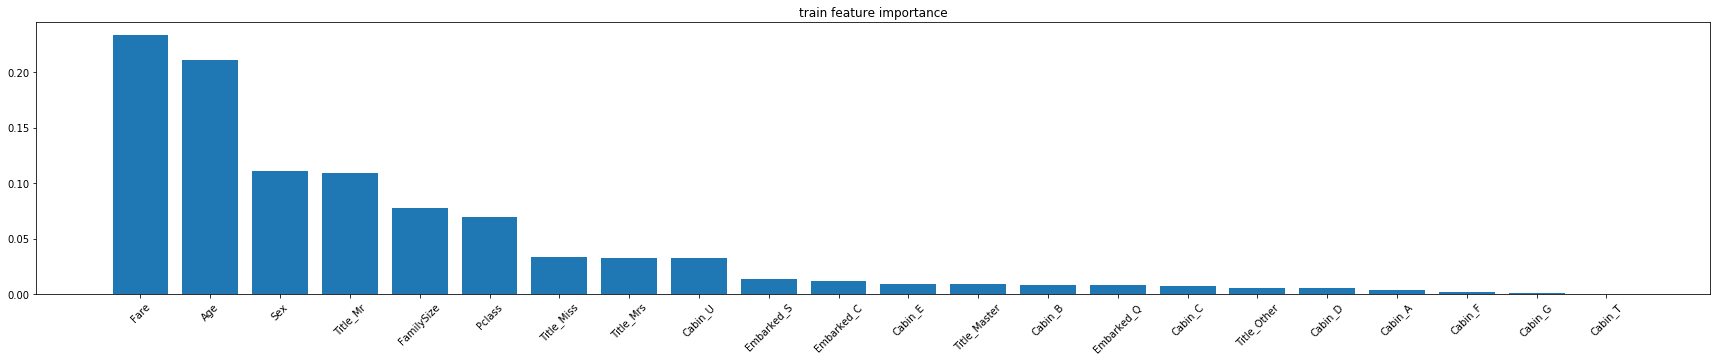

In [89]:
# Label of train feature importance
label = importances.index

# ndarray of labels & and value of each feature
index = np.arange(len(label))
ratio = importances.importance

plt.figure(figsize=(30,5))

# Create bars
plt.bar(index, ratio)

# Create names on the x-axis
plt.xticks(index, label, rotation='45')
    
# Title of the plot
plt.title("Train feature importance")

# Show graphic
plt.show()

In [90]:
train = train.drop("Title_Other", axis=1)
test  = test.drop("Title_Other", axis=1)

train  = train.drop("Title_Mrs", axis=1)
test  = test.drop("Title_Mrs", axis=1)

train  = train.drop("Title_Mr", axis=1)
test  = test.drop("Title_Mr", axis=1)

train  = train.drop("Title_Miss", axis=1)
test  = test.drop("Title_Miss", axis=1)

train  = train.drop("Title_Master", axis=1)
test  = test.drop("Title_Master", axis=1)

train  = train.drop("Embarked_S", axis=1)
test  = test.drop("Embarked_S", axis=1)

train  = train.drop("Embarked_Q", axis=1)
test  = test.drop("Embarked_Q", axis=1)

train  = train.drop("Embarked_C", axis=1)
test  = test.drop("Embarked_C", axis=1)

train  = train.drop("Cabin_U", axis=1)
test  = test.drop("Cabin_U", axis=1)

train  = train.drop("Cabin_T", axis=1)
test  = test.drop("Cabin_T", axis=1)

train  = train.drop("Cabin_G", axis=1)
test  = test.drop("Cabin_G", axis=1)

train  = train.drop("Cabin_F", axis=1)
test  = test.drop("Cabin_F", axis=1)

train  = train.drop("Cabin_E", axis=1)
test  = test.drop("Cabin_E", axis=1)

here is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. </br>What I am talking about is the out-of-bag samples to estimate the generalization accuracy. </br>Note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. </br>Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [92]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(train, y_train)
y_pred = random_forest.predict(test)

random_forest.score(train, y_train)

acc_random_forest = round(random_forest.score(train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

98.32 %
oob score: 82.15 %


## Hyperparameter Tuning

In [93]:
#param_grid = { 
#    "criterion" : ["gini", "entropy"], 
#    "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
#    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
#    "n_estimators": [100, 400, 700, 1000, 1500]
#}

#from sklearn.model_selection import GridSearchCV, cross_val_score

#rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
#clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

#clf.fit(X_train, Y_train)
#clf.best_params_

## Result ## 
# {'criterion': 'entropy',
# 'min_samples_leaf': 1,
# 'min_samples_split': 12,
# 'n_estimators': 100}

## Test new parameters

In [95]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 12,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(train, y_train)
y_pred = random_forest.predict(test)

random_forest.score(train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.5 %


# Further Evalutation

## Confusion Matrix

In [97]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[490,  59],
       [ 95, 247]])

The first row is about the not-survived-predictions: 
- **490 passengers were correctly classified as not survived** (called true negatives);
- **59 where wrongly classified as not survived** (false positives).

The second row is about the survived-predictions: 
- **95 passengers where wrongly classified as survived** (false negatives);
- **247 where correctly classified as survived** (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

## Precision and Recall

In [99]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8071895424836601
Recall: 0.7222222222222222


Our model predicts 80% of the time, a passengers survival correctly (precision). </br> The recall tells us that it predicted the survival of 72 % of the people who actually survived.

## F-Score

You can combine precision and recall into one score, which is called the F-score. </br>The F-score is computed with the harmonic mean of precision and recall. </br>Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [101]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7623456790123457

There we have it, a 76 % F-score. The score is not that high, because we have a recall of 72%. </br>But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. </br>This is a problem, because you sometimes want a high precision and sometimes a high recall. </br>The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). </br>This is called the precision/recall tradeoff. We will discuss this in the following section.

## Precision Recall Curve

For each person the Random Forest algorithm has to classify, </br>it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) </br>or as not survived (when the score is smaller than the threshold). </br>That’s why the threshold plays an important part.

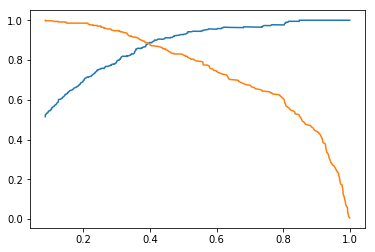

In [112]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

plt.plot(threshold, precision[:-1])
plt.plot(threshold, recall[:-1])
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 82%. </br>Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.
</br>You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. </br>If you want for example a precision of 86%, you can easily look at the plots and see that you would need a threshold of around 0.4. </br>Then you could train a model with exactly that threshold and would get the desired accuracy.</br>
Another way is to plot the precision and recall against each other:

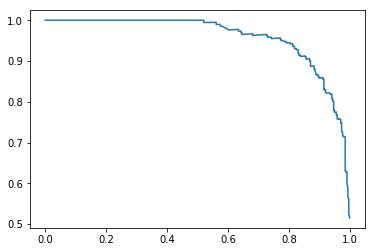

In [111]:
plt.plot(recall, precision)
plt.show()

## ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

trace1 = go.Scatter(
    x = false_positive_rate,
    y = true_positive_rate
)

trace2 = go.Scatter(
    x = [0, 1],
    y = [0, 1],
    marker = dict(
        color = 'rgba(255,0,0,.9)',
        line = dict(
            width = 2
        )
    )
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis=dict(
        title='False Positive Rate (FPR)'
    ),
    yaxis=dict(
        title='True Positive Rate (TPR)'
    ),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='train-titanic-precision-recall')

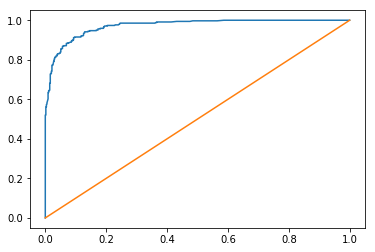

In [110]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1])

plt.show()

The orange line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

## ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [114]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9711943033053185


Nice ! I think that score is good enough to submit the predictions for the test-set to the Kaggle leaderboard.